# K-MEANS CLUSTERING
- Unsupervised learning ml algorithm
- here we will be working with unlabelled data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')

In [3]:
c_data = pd.read_csv(r"C:\Users\Bhupendra\Desktop\DataCenter\Clustering\Country-data.csv")
c_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
c_data.shape

(167, 10)

In [5]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
c_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
c_data.duplicated().sum()

0

In [14]:
# converting the percentage values into their absolute values

c_data['imports'] = (c_data['gdpp'] * c_data['imports'])/100
c_data['exports'] = (c_data['gdpp'] * c_data['exports'])/100
c_data['health'] = (c_data['gdpp'] * c_data['health'])/100

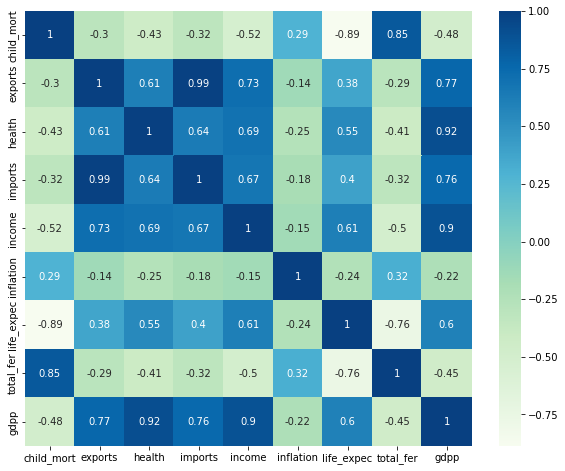

In [15]:
# correlation

plt.figure(figsize = (10,8))
sns.heatmap(c_data.corr(), annot = True, cmap = 'GnBu')
plt.show()

# Scaling

In [22]:
mmscaler = MinMaxScaler()
X_new = mmscaler.fit_transform(c_data.drop('country', axis = 1))

In [24]:
X_new[:1]

array([[4.26484907e-01, 2.95093321e-04, 3.36341972e-03, 1.66094560e-03,
        8.04720599e-03, 1.26143610e-01, 4.75345168e-01, 7.36593060e-01,
        3.07342821e-03]])

# Elbow Curve 
- finding the optimal value of K

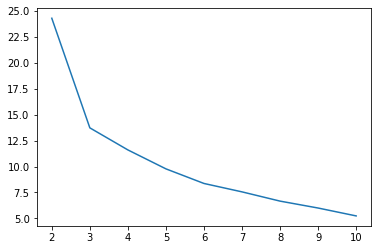

In [27]:
# Elbow Curve for initialising the value of K

wcss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(X_new)
    wcss.append([k, kmean.inertia_])
    
df_ec = pd.DataFrame(wcss)
plt.plot(df_ec[0], df_ec[1])
plt.show()

In [28]:
wcss

[[2, 24.291592668614573],
 [3, 13.728241930514683],
 [4, 11.601847847563672],
 [5, 9.77643391749045],
 [6, 8.368497447598385],
 [7, 7.559151166085805],
 [8, 6.6679662690017185],
 [9, 6.0018565667804555],
 [10, 5.241773582243932]]

# K = 3

In [29]:
kmean = KMeans(n_clusters = 3).fit(X_new)

In [34]:
labels = kmean.predict(X_new)
labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [41]:
new_df = pd.concat([c_data, pd.DataFrame(labels, columns = ["class"])], axis = 1)

In [42]:
new_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [43]:
new_df['class'].value_counts()

1    92
0    46
2    29
Name: class, dtype: int64

In [45]:
class_0 = new_df[new_df['class']==0]
class_1 = new_df[new_df['class']==1]
class_2 = new_df[new_df['class']==2]

### EDA on the above classes

# Class_0

In [46]:
class_0.mean()

child_mort      93.284783
exports        811.834109
health          94.207885
imports        748.806761
income        3516.804348
inflation       12.097065
life_expec      59.393478
total_fer        5.090217
gdpp          1695.913043
class            0.000000
dtype: float64

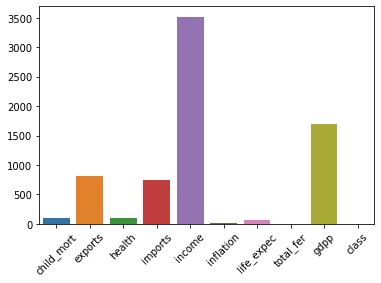

In [50]:
sns.barplot(class_0.mean().index,class_0.mean().values)
plt.xticks(rotation = 45)
plt.show()

# Class_1

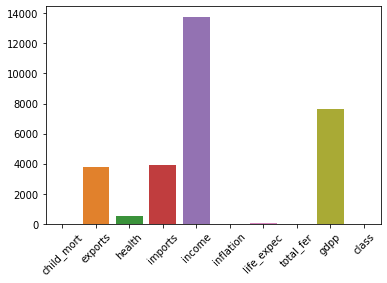

In [51]:
sns.barplot(class_1.mean().index,class_1.mean().values)
plt.xticks(rotation = 45)
plt.show()

# Class_2

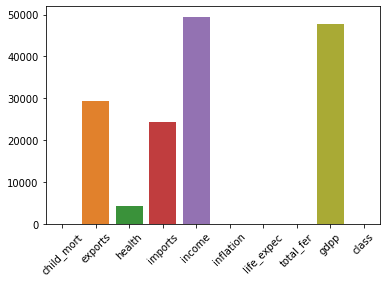

In [52]:
sns.barplot(class_2.mean().index,class_2.mean().values)
plt.xticks(rotation = 45)
plt.show()

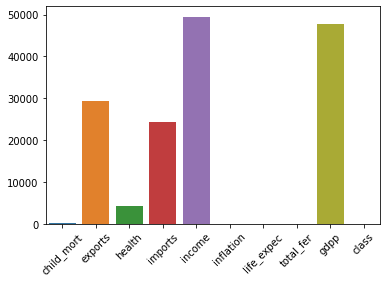

In [57]:
sns.barplot(class_0.mean().index,class_0.mean().values)
sns.barplot(class_1.mean().index,class_1.mean().values)
sns.barplot(class_2.mean().index,class_2.mean().values)

plt.xticks(rotation = 45)
plt.show()

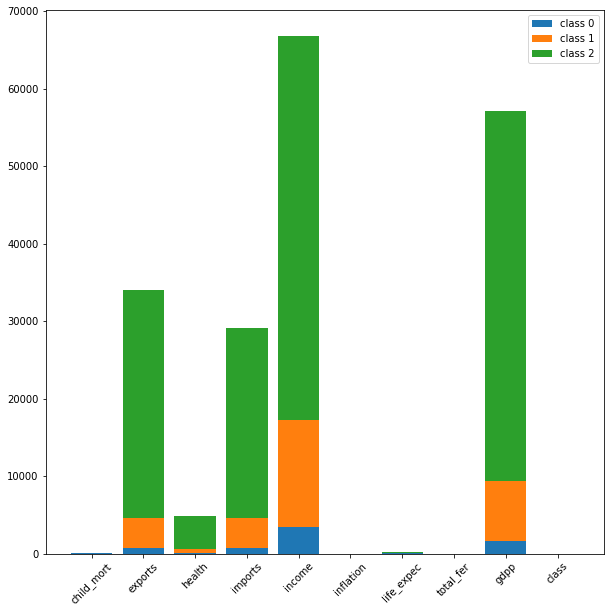

In [65]:
plt.figure(figsize = (10,10))
plt.bar(class_0.mean().index,class_0.mean().values, label = 'class 0')
plt.bar(class_1.mean().index,class_1.mean().values, bottom = class_0.mean().values, label = 'class 1')
plt.bar(class_2.mean().index,class_2.mean().values, bottom = np.array(class_0.mean().values)+np.array(class_1.mean().values), label = 'class 2')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

## Here countries belonging to class_0 are the poor countries in comparison to class_1 & class_2

## Finding the top 5 countries who are in direst need of funding

In [70]:
class_0.sort_values(by = ['gdpp','income','exports','imports']).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,class
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0


**Burundi, Liberia, Congo, Niger and Sierra Leone** are the most poor conuntries who are in direst need of funding.